# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick
from yellowbrick import datasets

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
X, Y = yellowbrick.datasets.loaders.load_concrete(data_home=None, return_dataset=False)

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [9]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error




regressors = {
    'Decision_Tree_Regressor': {'Regressor': DecisionTreeRegressor(max_depth=5)},
    'Random_Forest_Regressor': {'Regressor': RandomForestRegressor(max_depth=5)},
    'Gradient_Boosting_Regressor': {'Regressor': GradientBoostingRegressor(max_depth=5)}
}

results = pd.DataFrame(columns=['Regressor', 'Scoring', 'TrainingAccuracy', 'ValidationAccuracy'])

for regressorName, data in regressors.items():
    regressor = data['Regressor']

    # Fit the regressor
    regressor.fit(X,Y)

    crs_val = cross_validate(regressor, X, Y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

    avg_train_mse = -crs_val['train_score'].mean()
    avg_test_mse = -crs_val['test_score'].mean()

    newRow = {
        'Regressor': regressorName,
        'Scoring': 'neg_mean_sq',
        'TrainingAccuracy': avg_train_mse,
        'ValidationAccuracy': avg_test_mse
    }

    results.loc[len(results)] = newRow

print(results)








# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

                     Regressor      Scoring  TrainingAccuracy  \
0      Decision_Tree_Regressor  neg_mean_sq         47.918561   
1      Random_Forest_Regressor  neg_mean_sq         31.804941   
2  Gradient_Boosting_Regressor  neg_mean_sq          3.739270   

   ValidationAccuracy  
0          162.792015  
1          162.193150  
2           95.584348  


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [10]:
# TO DO: ADD YOUR CODE HERE
for regressorName, data in regressors.items():
    regressor = data['Regressor']

    # Fit the regressor
    regressor.fit(X,Y)

    crs_val = cross_validate(regressor, X, Y, scoring='r2', cv=5, return_train_score=True)

    avg_train_mse = crs_val['train_score'].mean()
    avg_test_mse = crs_val['test_score'].mean()

    newRow = {
        'Regressor': regressorName,
        'Scoring': 'r2',
        'TrainingAccuracy': avg_train_mse,
        'ValidationAccuracy': avg_test_mse
    }

    results.loc[len(results)] = newRow

print(results)

                     Regressor      Scoring  TrainingAccuracy  \
0      Decision_Tree_Regressor  neg_mean_sq         47.918561   
1      Random_Forest_Regressor  neg_mean_sq         31.804941   
2  Gradient_Boosting_Regressor  neg_mean_sq          3.739270   
3      Decision_Tree_Regressor           r2          0.822887   
4      Random_Forest_Regressor           r2          0.881743   
5  Gradient_Boosting_Regressor           r2          0.986436   

   ValidationAccuracy  
0          162.792015  
1          162.193150  
2           95.584348  
3            0.175363  
4            0.176208  
5            0.487536  


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.

While the regression models here all look to have lower mse than the linear regression, the values show some very serious signs of overfitting.  Example, Gradient Boosting Regressior, which is the most accurate of all the three regressors here, shows a mse training accuracy of 3.7, a tremendous value.  However the validation accuracy for the same thing is 95, more than an order of magnitude off.  Looking at last weeks assignment,  the mse for training and validation for the same value was 110 and 95.  Significantly more close, and even close enough to assume that overfitting wasnt expressly a part of the fit.  We can see the same effect taking place of overfitting,  seeing for r2 values for Gradient boosting being 0.98 for Trainign accuracy, and 0.48 for Validation Accuracy. Where in the linear model we have ~0.6 for both, meaning we were not overfit, and thus a representative model. 

1. Out of the models you tested, which model would you select for this dataset and why?

I would like to look further into the Gradient_Boosting_Regressor, and see if the overfitting could be corrected,  this shows the most promise of a very accurate model, however not if it is completely over fit.  If this cannot be corrected, I would then revert back to the Linear Model.  While it isnt as accurate, it also wont produce seemingly incorrect results. 

1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

Some things to better help the overfitting, would be things like data pruning, or some regularization.  If all else fails, back to the linear regression. 

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

Most of the code I followed the same format that I utilized in lab 2,  in terms of the loops to process everything.  Some of the information for syntax I had to look up in the library documentation, and some I had to look up from fathful ol' GPT. 

1. In what order did you complete the steps?

In the same order they were listed...like a sane human would.  In this case there wouldnt really have been much option to do it otherwise.  

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I asked it for some syntax for the tree based commands,  specifically the cross_validation.  While these things are generally not that complicated in how they function, there is a million different syntax's and if you tried to guess it, youd be here all day.  Especially since the intillisence in ipynb files is mega slow. 

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Just understanding syntax and the definitions for some of the attributies.  However just a quick google away.  

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [18]:
# TO DO: Import wine dataset

headers = ['Class','Alcohol', 'Malic Acid','Ash','Alcalinity of Ash','Magnesium','Total Phenols','Flavanoids','Nonflavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of Diluted Wines','Proline']

data = pd.read_csv('wine.data', header=None, names=headers)

y = data['Class']
X = data.drop('Class',axis=1)

print("X size:", X.shape)
print("y size:", y.shape)
print("X type:", type(X))
print("y type:", type(y))

X size: (178, 13)
y size: (178,)
X type: <class 'pandas.core.frame.DataFrame'>
y type: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [20]:
# TO DO: ADD YOUR CODE HERE
data.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values



In [21]:
# TO DO: ADD YOUR CODE HERE
missing_values = data.isnull().sum().sum()
print(missing_values)

0


How many samples do we have of each type of wine?

In [22]:
# TO DO: ADD YOUR CODE HERE

wine_counts = data['Class'].value_counts()

wine_counts

Class
2    71
1    59
3    48
Name: count, dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [24]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

classifiers = {
    'SVC': {'Classifier': cross_validate(svc_model, X, y, cv=5, scoring='accuracy', return_train_score=True)},
    'DecisionTree': {'Classifier': cross_validate(dt_model, X, y, cv=5, scoring='accuracy', return_train_score=True)}
}

results2 = pd.DataFrame(columns=['Classifier', 'TrainingAccuracy', 'ValidationAccuracy'])

for classifierName, data in classifiers.items():
    classifier = data['Classifier']

    train_score = classifier['train_score'].mean()
    test_score = classifier['test_score'].mean()

    newRow = {
        'Classifier': classifierName,
        'TrainingAccuracy': train_score,
        'ValidationAccuracy': test_score
    }

    results2.loc[len(results2)] = newRow


print(results2)


# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

     Classifier  TrainingAccuracy  ValidationAccuracy
0           SVC          0.703743            0.663492
1  DecisionTree          0.974756            0.876508


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [25]:
# TO DO: Implement best model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)




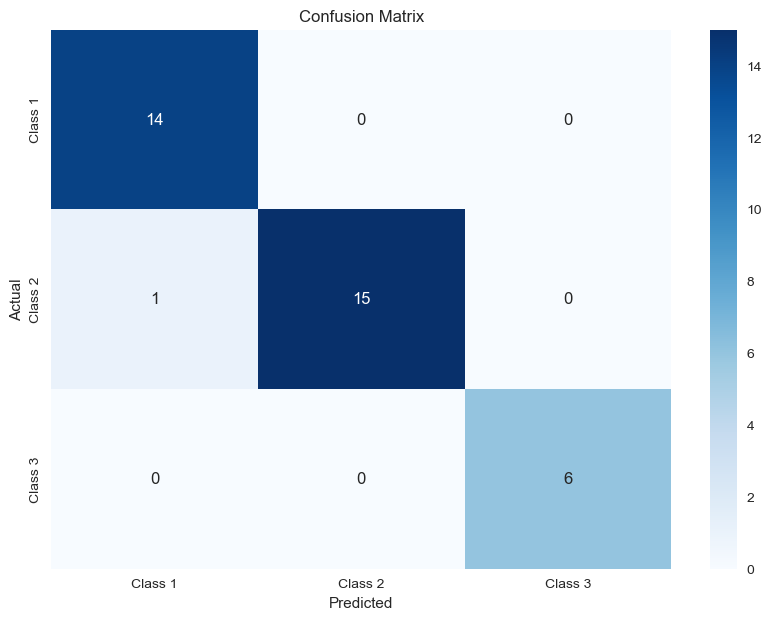

In [26]:
# TO DO: Print confusion matrix using a heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# TO DO: Print classification report

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.

We saw that the decision tree model had better results, 97% training, and 87% validation.  This may squew slightly towards a small overfit, however I dont think that it is entirely outside the realms of normality.  If we were doing a bigger model, I would put some more time into refining to get the model to a better fit, however I feel like this is representative at this point.  The SVC was slightly lower accuracy at 70 and 66% respectively.  A more consistent model, however not as accurate as the decision tree.  

1. What are two reasons why the support vector machines model did not work as well as the tree-based model?

Something like this context,  wine,  is largely based on features of the wine itself.  Such when you have a feature based model, soemthing like a decision tree is a perfect model.  SVC has the ability to model non-linearities, however must be done so with some kernel tricks, and it wasnt really what this mdoel was built for.  

1. How many samples were incorrectly classified in step 5.2? 

Only 1!

1. In this case, is maximizing precision or recall more important? Why?

I think here, precision is more important,  as we are trying to directly classify many different wines and specify them with their correct class.  If we were only trying to identify one aspect or one class in particular, than recall would be more important, however in this case I see this being used as a winemakers tool, to help determine if their wine is to spec with their brand's reputation etc, and if it isnt, then...make some different wine haha.  

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

Code came from all over the place,  some lecture slides,  soem of teh library documentation, soem youtube, and some GPT. 

1. In what order did you complete the steps?

Top to bottom,  no other way in this case. 

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

My use of generative AI is largely a time saving thing to not have to read through pages and pages of documentation to understand the syntax,  so my prompts will be somethign along the lines of "I want to make this decision tree with a max of 3 levels in it for this application,  where do I start?"

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I would like to get better at being able to know more of this stuff off hand.  I understand the mdoels and what they are doing, however just getting a more consistent grasp of the syntax to be able to do this without as much "aid" would be lovely.  However, like all programming I believe this is just a time and practice thing. 

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

I am seeing more and more, that the different applications have very different optimum models.  You can have a model that works fantastic for something in one context,  say normal distribution of student height,  or a linear regression model for trees growth vs temperature or latitude, and you can get a 95% model here.  But no doubt that the same linear regression model would work like hot garbage when taken to this wine example, and vice versa.  The code and the context of this class is not inherently difficult,  its straight forward, and the mathematic models are fairly easy to grasp.  I think it is really just the practice of understanding what types of data sets will be best represented by which model.  YOu can take an iterative approach to this, however I do also believe that this is something that might also come with expereince, after seeing gazillions of data sets,  one might be able to better predict what model is going to perform the best in the respective context. 

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

I liked this assignment as it gives some more examples of some more applications, and different models that can be used.  I like the format of these assignments, as it is real data, for real applications,  nto just the same silly programmign questions over and over again, I feel like I really do grasp teh concept and learn better in this format.   I also like being familiarized with more models, and their use cases.  I am also a big wine snob,  so i particularly enjoyed part 2 of this assignment.  

*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [1]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*